In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Define the base path to your dataset
# This path points to the 'Data' folder which contains the train, test, and valid subdirectories.
dataset_path = 'C:/Users/abhis/OneDrive/Documents/Class/Digital_Health/Dataset/Data'

train_dir = os.path.join(dataset_path, 'train')
test_dir = os.path.join(dataset_path, 'test')
validation_dir = os.path.join(dataset_path, 'valid')

# Use ImageDataGenerator for data augmentation and preprocessing
datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32
img_width, img_height = 224, 224

train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 613 images belonging to 4 classes.
Found 72 images belonging to 4 classes.
Found 315 images belonging to 4 classes.


In [6]:
# Build a simple Convolutional Neural Network (CNN)
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dense(4, activation='softmax') # 4 classes: adenocarcinoma, large cell carcinoma, normal, and squamous cell carcinoma
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

c:\Users\abhis\anaconda3\envs\LungCancer_Classification_And_Prediction\lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,398,148 (169.37 MB)

 Trainable params: 44,398,148 (169.37 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the image dimensions from your data generator
img_width, img_height = 224, 224

# Build the CNN model using the recommended Input layer
model = Sequential([
    # This is the new, recommended way to define the input shape
    keras.Input(shape=(img_width, img_height, 3)),
    
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(512, activation='relu'),
    Dense(4, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    44,302,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,398,148 (169.37 MB)

 Trainable params: 44,398,148 (169.37 MB)

 Non-trainable params: 0 (0.00 B)

Image counts per class (Training set):
adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib: 195 images
large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa: 115 images
normal: 148 images
squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa: 155 images


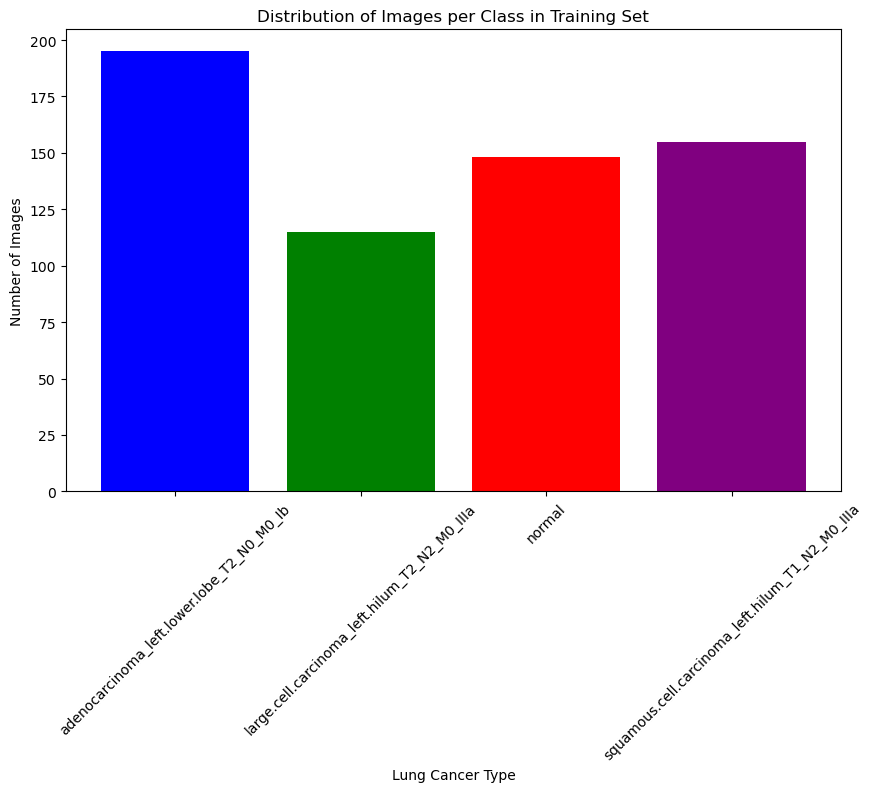

In [9]:
import os
import matplotlib.pyplot as plt
#######Class Distribution Analysis
# Define the base path to your dataset's 'train' folder
dataset_path = 'C:/Users/abhis/OneDrive/Documents/Class/Digital_Health/Dataset/Data'
train_dir = os.path.join(dataset_path, 'train')

# Get the list of subdirectories (classes)
class_names = sorted(os.listdir(train_dir))
class_counts = {class_name: len(os.listdir(os.path.join(train_dir, class_name))) for class_name in class_names}

print("Image counts per class (Training set):")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count} images")

# Visualize the class distribution
classes = list(class_counts.keys())
counts = list(class_counts.values())

plt.figure(figsize=(10, 6))
plt.bar(classes, counts, color=['blue', 'green', 'red', 'purple'])
plt.title('Distribution of Images per Class in Training Set')
plt.xlabel('Lung Cancer Type')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.show()

In [14]:
import os
from PIL import Image
import numpy as np
# 2.1 Image Dimensions and Distribution
# Define the path to your dataset's 'train' folder
dataset_path = 'C:/Users/abhis/OneDrive/Documents/Class/Digital_Health/Dataset/Data'
train_dir = os.path.join(dataset_path, 'train')

# Check and store all image dimensions
image_dimensions = {}
for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            try:
                with Image.open(img_path) as img:
                    dims = img.size
                    if dims in image_dimensions:
                        image_dimensions[dims] += 1
                    else:
                        image_dimensions[dims] = 1
            except:
                print(f"Could not open image: {img_path}")

print("Image size distribution in the training set:")
for dims, count in image_dimensions.items():
    print(f"  {dims}: {count} images")

Image size distribution in the training set:
  (409, 264): 1 images
  (397, 243): 1 images
  (392, 244): 1 images
  (377, 220): 1 images
  (373, 272): 1 images
  (449, 288): 1 images
  (389, 276): 1 images
  (384, 328): 1 images
  (417, 323): 1 images
  (341, 247): 1 images
  (386, 232): 1 images
  (410, 246): 1 images
  (390, 250): 1 images
  (414, 274): 1 images
  (423, 242): 1 images
  (419, 269): 1 images
  (429, 259): 1 images
  (373, 211): 1 images
  (413, 305): 1 images
  (413, 286): 1 images
  (387, 258): 1 images
  (377, 284): 1 images
  (432, 206): 1 images
  (391, 295): 1 images
  (396, 296): 1 images
  (384, 232): 1 images
  (418, 267): 1 images
  (410, 313): 1 images
  (416, 278): 1 images
  (385, 196): 1 images
  (345, 244): 1 images
  (440, 274): 1 images
  (439, 250): 1 images
  (400, 240): 1 images
  (349, 239): 1 images
  (393, 320): 1 images
  (449, 310): 1 images
  (364, 224): 1 images
  (423, 249): 1 images
  (338, 258): 1 images
  (402, 252): 1 images
  (377, 288)

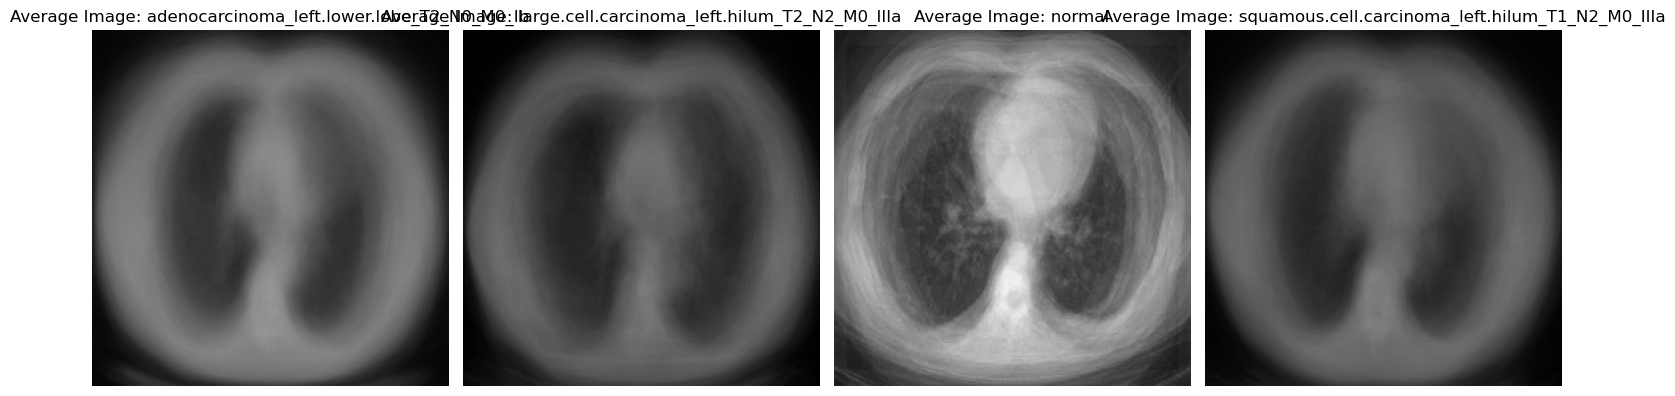

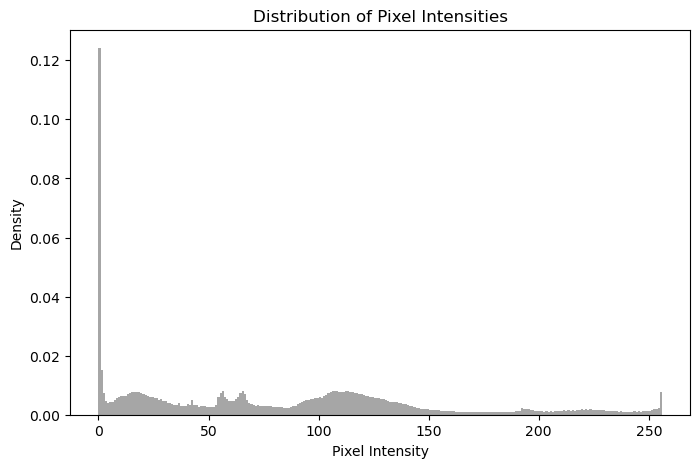

Average pixel variance for adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib: 2334.83
Average pixel variance for large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa: 1742.91
Average pixel variance for normal: 5859.98
Average pixel variance for squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa: 1608.22


In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
# ## 2.2Average Image and Pixel-Level Analysis
# Define the path to your dataset's 'train' folder
dataset_path = 'C:/Users/abhis/OneDrive/Documents/Class/Digital_Health/Dataset/Data'
train_dir = os.path.join(dataset_path, 'train')

# Get the list of subdirectories (classes)
class_names = sorted(os.listdir(train_dir))

# Initialize dictionaries to store pixel sums and counts for each class
class_pixel_sums = {name: np.zeros((224, 224, 3), dtype=np.float64) for name in class_names}
class_image_counts = {name: 0 for name in class_names}
all_pixels = []

# Process all images
for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = load_img(img_path, target_size=(224, 224))
        img_array = img_to_array(img)
        
        # Add to pixel sum and count
        class_pixel_sums[class_name] += img_array
        class_image_counts[class_name] += 1
        
        # Add to the list for pixel-level analysis
        all_pixels.extend(img_array.flatten())

# Calculate and display the average image for each class
plt.figure(figsize=(15, 5))
for i, class_name in enumerate(class_names):
    avg_img = (class_pixel_sums[class_name] / class_image_counts[class_name]).astype(np.uint8)
    ax = plt.subplot(1, len(class_names), i + 1)
    plt.imshow(avg_img)
    plt.title(f"Average Image: {class_name}")
    plt.axis('off')
plt.tight_layout()
plt.show()

# Pixel intensity histogram
plt.figure(figsize=(8, 5))
plt.hist(all_pixels, bins=256, range=(0, 256), density=True, color='gray', alpha=0.7)
plt.title('Distribution of Pixel Intensities')
plt.xlabel('Pixel Intensity')
plt.ylabel('Density')
plt.show()

# Inter-Class Variability (Variance)
class_pixel_variances = {name: np.zeros((224, 224, 3), dtype=np.float64) for name in class_names}
for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)
    images_in_class = []
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = load_img(img_path, target_size=(224, 224))
        images_in_class.append(img_to_array(img))
    
    # Calculate variance
    images_in_class_array = np.array(images_in_class)
    variance_img = np.var(images_in_class_array, axis=0)
    class_pixel_variances[class_name] = np.mean(variance_img)
    print(f"Average pixel variance for {class_name}: {class_pixel_variances[class_name]:.2f}")

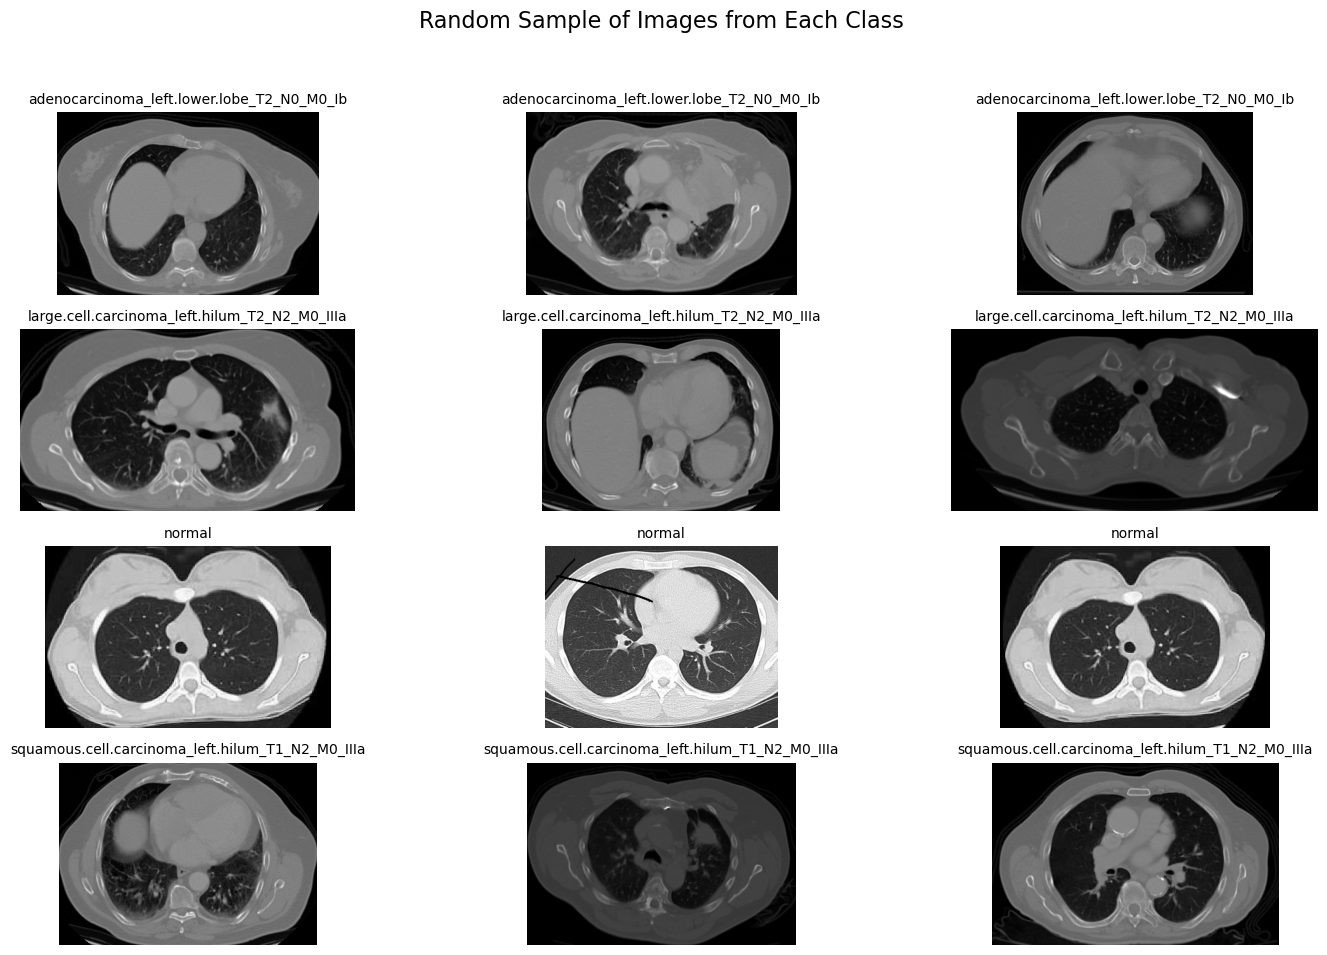

In [16]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image
### 3.1 visual Inspection 
# Define the path to your dataset's 'train' folder
dataset_path = 'C:/Users/abhis/OneDrive/Documents/Class/Digital_Health/Dataset/Data'
train_dir = os.path.join(dataset_path, 'train')

# Get the list of subdirectories (classes)
class_names = sorted(os.listdir(train_dir))

# Display a random sample of images from each class
num_samples_to_show = 3
plt.figure(figsize=(15, 10))
plt.suptitle('Random Sample of Images from Each Class', fontsize=16)

for i, class_name in enumerate(class_names):
    class_path = os.path.join(train_dir, class_name)
    image_files = [f for f in os.listdir(class_path) if f.endswith(('png', 'jpg', 'jpeg', 'bmp'))]
    random_images = random.sample(image_files, num_samples_to_show)

    for j, img_name in enumerate(random_images):
        img_path = os.path.join(class_path, img_name)
        img = Image.open(img_path)
        
        ax = plt.subplot(len(class_names), num_samples_to_show, i * num_samples_to_show + j + 1)
        plt.imshow(img)
        plt.title(f"{class_name}", fontsize=10)
        plt.axis("off")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [ ]:
import os
import imagehash
from PIL import Image
### Duplicate Images
# Define the path to your dataset's 'train' folder
dataset_path = 'C:/Users/abhis/OneDrive/Documents/Class/Digital_Health/Dataset/Data'
train_dir = os.path.join(dataset_path, 'train')

hashes = {}
duplicates = {}
total_images = 0

print("Scanning for duplicate images...")

for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            total_images += 1
            try:
                with Image.open(img_path) as img:
                    img_hash = str(imagehash.phash(img))
                    
                    if img_hash in hashes:
                        if img_hash not in duplicates:
                            duplicates[img_hash] = [hashes[img_hash]]
                        duplicates[img_hash].append(img_path)
                    else:
                        hashes[img_hash] = img_path
            except Exception as e:
                print(f"Skipping corrupted image: {img_path} - {e}")

print(f"Total images scanned: {total_images}")
if duplicates:
    print("\nFound the following duplicate images:")
    for h, paths in duplicates.items():
        print(f"Hash: {h} - Found {len(paths)} duplicates")
        for p in paths:
            print(f"  - {p}")
else:
    print("No duplicate images found.")

Scanning for duplicate images...
Total images scanned: 613

Found the following duplicate images:
Hash: 9933543b5e3869e4 - Found 2 duplicates
  - C:/Users/abhis/OneDrive/Documents/Class/Digital_Health/Dataset/Data\train\adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib\ad16.png
  - C:/Users/abhis/OneDrive/Documents/Class/Digital_Health/Dataset/Data\train\adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib\ad21.png
Hash: 913947e51acc299f - Found 2 duplicates
  - C:/Users/abhis/OneDrive/Documents/Class/Digital_Health/Dataset/Data\train\adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib\ad10.png
  - C:/Users/abhis/OneDrive/Documents/Class/Digital_Health/Dataset/Data\train\adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib\ad3.png
Hash: d916073a1e797a61 - Found 2 duplicates
  - C:/Users/abhis/OneDrive/Documents/Class/Digital_Health/Dataset/Data\train\large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa\000033 (3).png
  - C:/Users/abhis/OneDrive/Documents/Class/Digital_Health/Dataset/Data\train\large.cell.carcinoma_left.hilum_T2

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
##### Outlier Images
# Define the path to your dataset's 'train' folder
dataset_path = 'C:/Users/abhis/OneDrive/Documents/Class/Digital_Health/Dataset/Data'
train_dir = os.path.join(dataset_path, 'train')

pixel_averages = []
image_paths = []

print("Analyzing pixel intensities...")

for class_name in os.listdir(train_dir):
    class_path = os.path.join(train_dir, class_name)
    if os.path.isdir(class_path):
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            try:
                with Image.open(img_path).convert('L') as img: # Convert to grayscale
                    pixel_avg = np.mean(np.array(img))
                    pixel_averages.append(pixel_avg)
                    image_paths.append(img_path)
            except:
                continue

# Calculate the mean and standard deviation
mean_intensity = np.mean(pixel_averages)
std_dev_intensity = np.std(pixel_averages)
print(f"Average pixel intensity: {mean_intensity:.2f}")
print(f"Standard deviation: {std_dev_intensity:.2f}")

# Define a threshold for outliers (e.g., 2 standard deviations)
outlier_threshold = 2
outliers = [path for i, path in enumerate(image_paths) if abs(pixel_averages[i] - mean_intensity) > outlier_threshold * std_dev_intensity]

print(f"\nFound {len(outliers)} potential outliers:")
if outliers:
    for outlier_path in outliers:
        print(f"  - {outlier_path}")

Analyzing pixel intensities...
Average pixel intensity: 82.36
Standard deviation: 32.88

Found 35 potential outliers:
  - C:/Users/abhis/OneDrive/Documents/Class/Digital_Health/Dataset/Data\train\adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib\ad1.png
  - C:/Users/abhis/OneDrive/Documents/Class/Digital_Health/Dataset/Data\train\adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib\ad11.png
  - C:/Users/abhis/OneDrive/Documents/Class/Digital_Health/Dataset/Data\train\adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib\ad15.png
  - C:/Users/abhis/OneDrive/Documents/Class/Digital_Health/Dataset/Data\train\adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib\ad17.png
  - C:/Users/abhis/OneDrive/Documents/Class/Digital_Health/Dataset/Data\train\adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib\ad19.png
  - C:/Users/abhis/OneDrive/Documents/Class/Digital_Health/Dataset/Data\train\adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib\ad2.png
  - C:/Users/abhis/OneDrive/Documents/Class/Digital_Health/Dataset/Data\train\adenocarcinoma_left.lower.